## DecisionTreeClassfier

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112)

dt_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf_3.fit(X_train, y_train)
pred = dt_clf_3.predict(X_test)

accuracy_score(y_test, pred)

0.9666666666666667

In [2]:
dt_clf_3.classes_

array([0, 1, 2])

In [3]:
dt_clf_3.feature_importances_ # 피쳐 중요도

array([0.        , 0.        , 0.62769356, 0.37230644])

In [4]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

1.0

In [5]:
dt_clf.classes_

array([0, 1, 2])

In [6]:
dt_clf.feature_importances_

array([0.01252348, 0.        , 0.60026011, 0.3872164 ])

In [7]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

## GraphViz

In [8]:
from sklearn.tree import export_graphviz

# out_file : 파일 저장할 이름, impurity, filled : 색 채우기
export_graphviz(dt_clf_3, out_file='output_3.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=True, filled=True)
export_graphviz(dt_clf, out_file='output.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=True, filled=True)

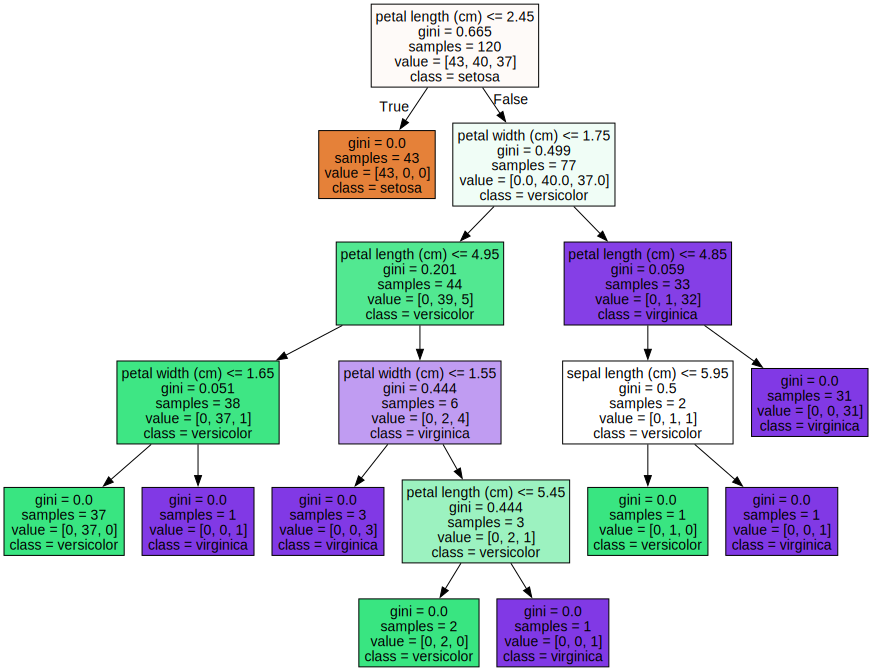

In [9]:
import graphviz

with open('output.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
# 그래프 사진 저장
# dot -Tpng output_3.dot -o output_3.png

Feature Importance : 
[0.013 0.    0.6   0.387]
sepal length (cm) : 0.013
sepal width (cm) : 0.000
petal length (cm) : 0.600
petal width (cm) : 0.387


<Axes: >

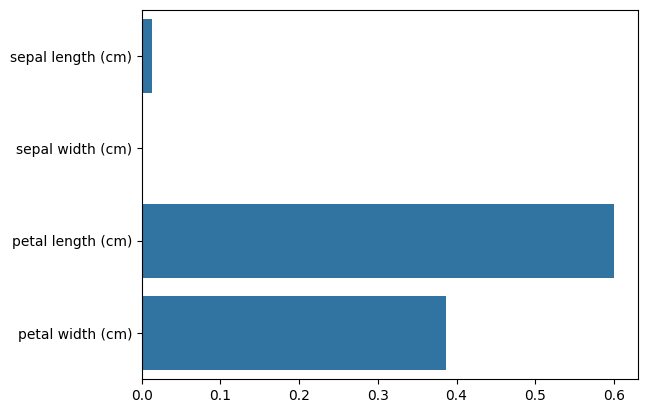

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

print(f'Feature Importance : \n{np.round(dt_clf.feature_importances_, 3)}')

for name, value in zip(iris.feature_names, dt_clf.feature_importances_) :
    print(f'{name} : {value:.3f}')

sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

## make_classification
- n_samples : 표본 데이터의 수 (default=100)
- n_features : 독립 변수의 수(전체 피처의 수) (default=20)
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수 (default=2)
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수 (default=2)
- n_repeated : 독립 변수 중 단순 중복된 성분의 수 (default=0)
- n_classes : 종속 변수의 클래스 수 (default=2)
- n_clusters_per_class : 클래스 당 클러스터의 수 (default=2)
- weights : 각 클래스에 할당된 표본 수 (default=None)
- flip_y : 클래스가 임의로 교환되는 샘플의 일부, 라벨에 노이즈를 생성하여 분류를 어렵게 만든다(default=0.01)

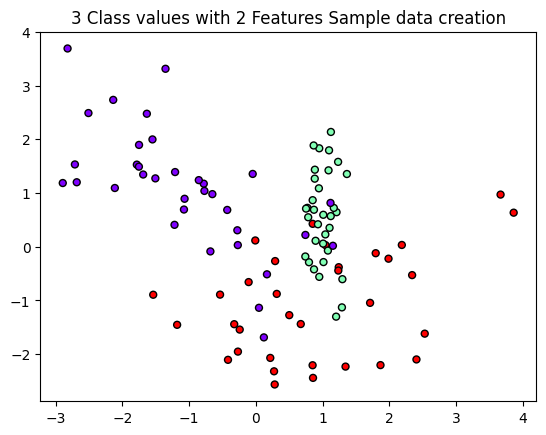

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [13]:
import numpy as np
def visualize_boundary(model, X, y) :
    fig, ax = plt.subplots()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolors='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    model.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53442/4089509267.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


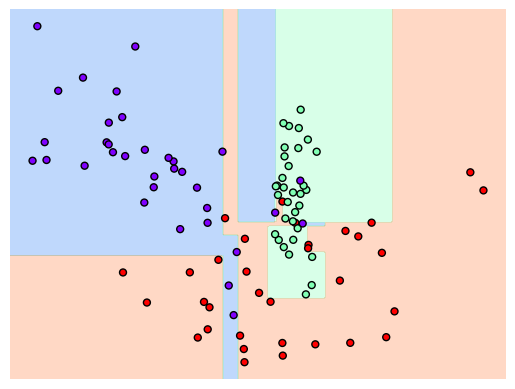

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
visualize_boundary(dt_clf, X_features, y_labels)

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53442/4089509267.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


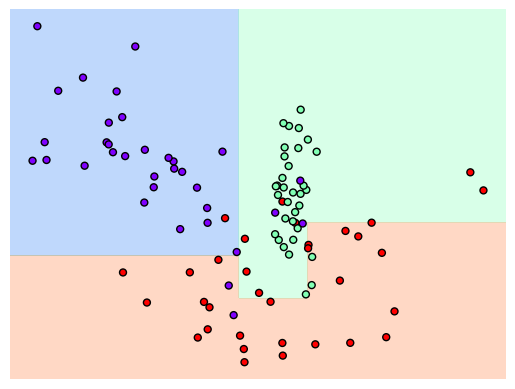

In [15]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## Human Activity (사용자 행동 인식 데이터 셋)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('datasets/UCI HAR Dataset/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [17]:
feature_name_df.head(20)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [18]:
# 중복 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [19]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+
                                                                                              str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [20]:
get_new_feature_name_df(feature_name_df)

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53442/3386614886.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(x[1]) if x[1] > 0 else x[0], axis=1)
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53442/3386614886.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+


,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [21]:
import pandas as pd
def get_human_dataset():
    # 각 데이터 파일이 공백으로 분리되어 있어, 공백문자를 sep로 할당
    feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/features.txt', sep=' ',
                                 header=None, names=['column_index', 'column_name'])
    # 중복 이름 변경
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv('./datasets/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    # print(x_train)
    x_test = pd.read_csv('./datasets/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./datasets/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./datasets/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return x_train, x_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = get_human_dataset()

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53442/3386614886.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(x[1]) if x[1] > 0 else x[0], axis=1)
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53442/3386614886.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+


In [24]:
y_train.describe()

,action
count,7352.000000
mean,3.643362
std,1.744802
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [31]:
# 문자를 숫자로 바꿔주는 (1~6)을 (0~5)로 교체 컴퓨터는 0부터 시작하니까
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train['action'])

result = encoder.transform(y_train['action'])
y_train['action'] = result

In [33]:
y_train.describe()

,action
count,7352.000000
mean,2.643362
std,1.744802
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


In [34]:
result = encoder.transform(y_test['action'])
y_test['action'] = result

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV # CrossValidtion
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=0)

parameters = {'max_depth' : [5,7,10,15,20]}

clf = GridSearchCV(estimator=dt_clf, param_grid=parameters, cv=3)

clf.fit(X_train, y_train)

result = clf.predict(X_test)

In [42]:
clf.best_params_ # {'max_depth': 7}

{'max_depth': 7}

In [43]:
# 실제값, 예측값
accuracy_score(y_test, result)

0.8639294197488971

In [57]:
dt_clf_7 = DecisionTreeClassifier(max_depth=7, random_state=0) # random_state는 통일시켜주어야 함 (몇번째 데이터부터 시작할까요?)
dt_clf_7.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [58]:
dt_clf_7.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00066859, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00689307, 0.        , 0.        ,
       0.        , 0.00414678, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00126255,
       0.00646193, 0.        , 0.26026599, 0.00213366, 0.        ,
       0.        , 0.        , 0.01688174, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00488074, 0.        , 0.        ,
       0.        , 0.00310705, 0.        , 0.        , 0.10431

In [59]:
# 피쳐중요도 순 정리
l = sorted(enumerate(dt_clf_7.feature_importances_), reverse=True, key=lambda x:x[1])

In [69]:
l = pd.DataFrame(l)
l.iloc[:10]

,0,1
0,52,0.260266
1,389,0.218383
2,559,0.142793
3,508,0.118629
4,74,0.104318
5,448,0.024625
6,159,0.016964
7,57,0.016882
8,209,0.016171
9,275,0.009065


In [60]:
feature_indicates = [i[0] for i in l] [0:10]

In [61]:
feature_indicates

[52, 389, 559, 508, 74, 448, 159, 57, 209, 275]

In [63]:
X_train.columns[feature_indicates]

Index(['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16',
       'angle(Y,gravityMean)', 'fBodyAccMag-energy()',
       'tGravityAcc-arCoeff()-Z,2', 'fBodyGyro-maxInds-X',
       'tBodyGyro-correlation()-Y,Z', 'tGravityAcc-energy()-Y',
       'tBodyAccMag-arCoeff()1', 'fBodyAcc-max()-Y'],
      dtype='object')

In [71]:
cv_results_df = pd.DataFrame(clf.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,5,0.824673
1,7,0.839227
2,10,0.829839
3,15,0.821680
4,20,0.824265


In [72]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339
